In [1]:
# Mount  Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


4422102/4422102 [==============================] - 0s 0us/step
Epoch 1/5
235/235 [==============================] - 7s 24ms/step - loss: 0.6957 - accuracy: 0.0015 - val_loss: 0.6955 - val_accuracy: 0.0018
Epoch 2/5
235/235 [==============================] - 3s 12ms/step - loss: 0.6954 - accuracy: 0.0016 - val_loss: 0.6953 - val_accuracy: 0.0020
Epoch 3/5
235/235 [==============================] - 3s 11ms/step - loss: 0.6952 - accuracy: 0.0019 - val_loss: 0.6950 - val_accuracy: 0.0021
Epoch 4/5
235/235 [==============================] - 3s 12ms/step - loss: 0.6949 - accuracy: 0.0019 - val_loss: 0.6948 - val_accuracy: 0.0023
Epoch 5/5
313/313 [==============================] - 1s 2ms/step


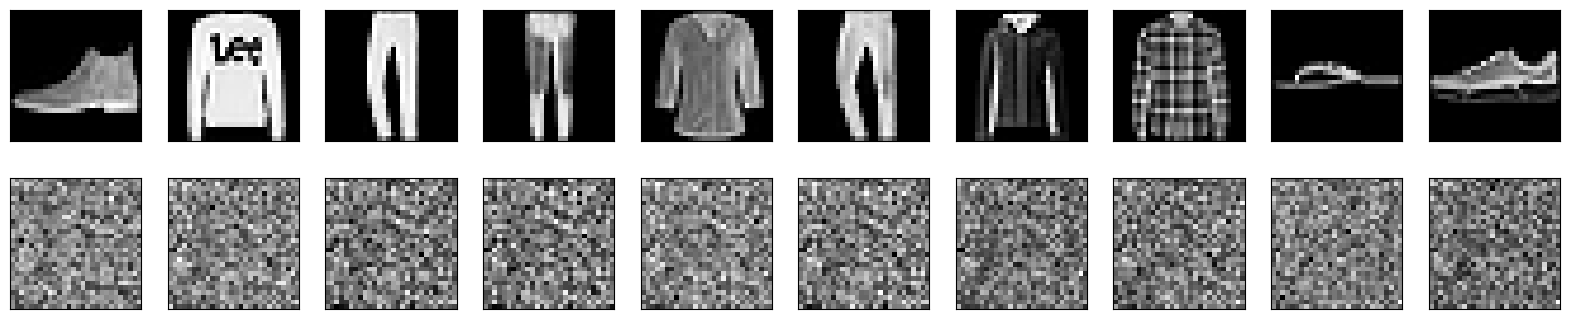

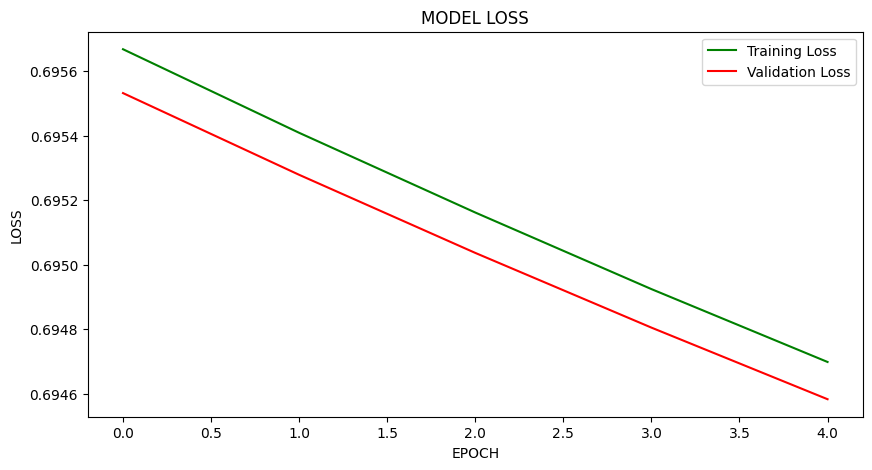

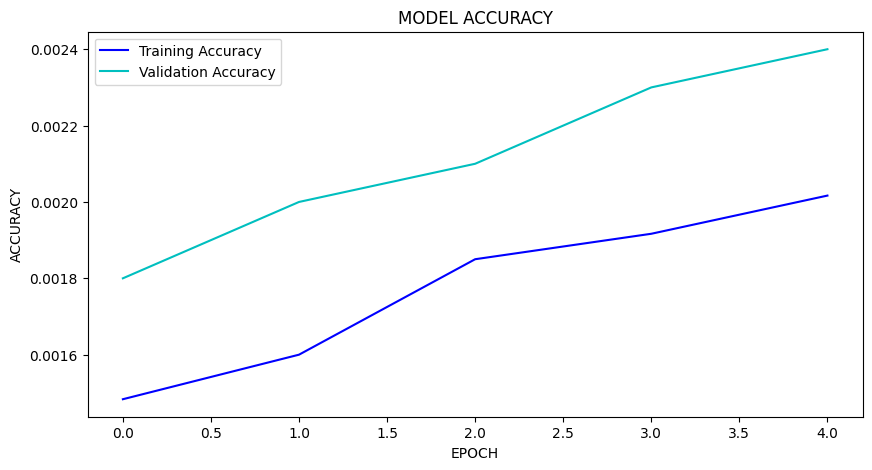

In [2]:
from keras.layers import Input, Dense
from keras.models import Model
from keras.datasets import fashion_mnist
import numpy as np
import matplotlib.pyplot as plt

# Loading the training and testing of image and label
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

# adding an additional hidden layer

# this is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats
# this is our input placeholder
input_img = Input(shape=(784,))
# "encoded" is the  encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)
# 'hidden" layer to the autoencoder
hidden = Dense(64, activation='relu')(encoded)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(encoded)
# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)
# this model maps an input to its encoded representation
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy', metrics=['accuracy'])

# Training the model
history = autoencoder.fit(x_train, x_train,
                          epochs=5,
                          batch_size=256,
                          shuffle=True,
                          validation_data=(x_test, x_test))

# Predictions on the test data
decoded_imgs = autoencoder.predict(x_test)

# Visualization of Original and Reconstructed images (test_data)
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # Original data
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Reconstruction data
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

# Plotting the Loss
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], 'g-', label='Training Loss')
plt.plot(history.history['val_loss'], 'r-', label='Validation Loss')
plt.title('MODEL LOSS')
plt.xlabel('EPOCH')
plt.ylabel('LOSS')
plt.legend()
plt.show()

# Plotting the Accuracy
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], 'b-', label='Training Accuracy')
plt.plot(history.history['val_accuracy'], 'c-', label='Validation Accuracy')
plt.title('MODEL ACCURACY')
plt.xlabel('EPOCH')
plt.ylabel('ACCURACY')
plt.legend()
plt.show()


Epoch 1/10
235/235 [==============================] - 4s 14ms/step - loss: 0.6974 - accuracy: 0.0010 - val_loss: 0.6971 - val_accuracy: 9.0000e-04
Epoch 2/10
235/235 [==============================] - 5s 21ms/step - loss: 0.6971 - accuracy: 0.0010 - val_loss: 0.6968 - val_accuracy: 8.0000e-04
Epoch 3/10
235/235 [==============================] - 6s 27ms/step - loss: 0.6968 - accuracy: 0.0011 - val_loss: 0.6965 - val_accuracy: 8.0000e-04
Epoch 4/10
235/235 [==============================] - 5s 22ms/step - loss: 0.6965 - accuracy: 0.0011 - val_loss: 0.6963 - val_accuracy: 9.0000e-04
Epoch 5/10
235/235 [==============================] - 6s 25ms/step - loss: 0.6962 - accuracy: 0.0010 - val_loss: 0.6960 - val_accuracy: 9.0000e-04
Epoch 6/10
235/235 [==============================] - 4s 18ms/step - loss: 0.6960 - accuracy: 0.0010 - val_loss: 0.6958 - val_accuracy: 9.0000e-04
Epoch 7/10
235/235 [==============================] - 3s 12ms/step - loss: 0.6957 - accuracy: 0.0010 - val_loss: 0.695

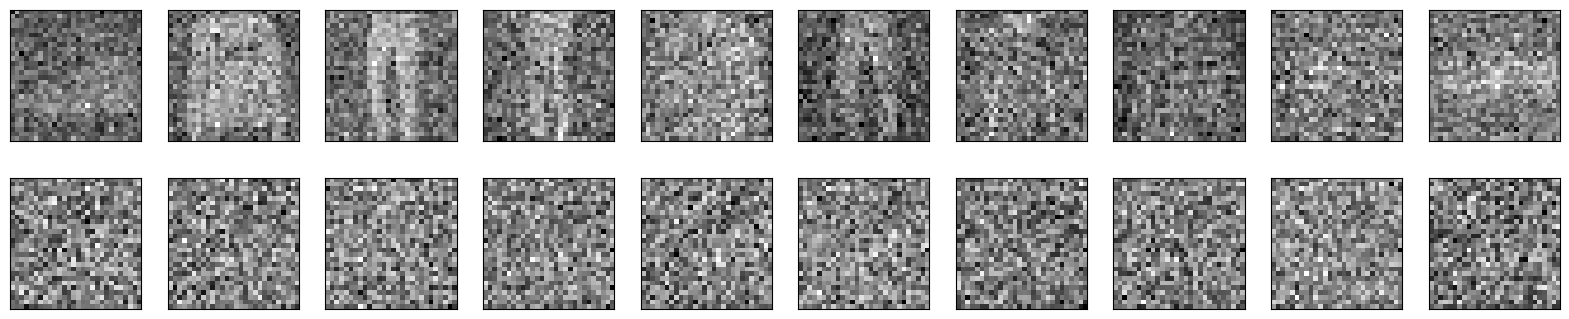

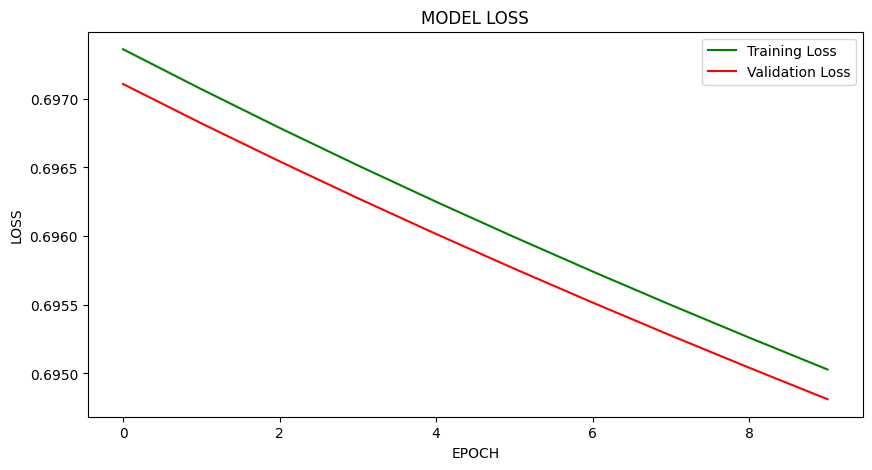

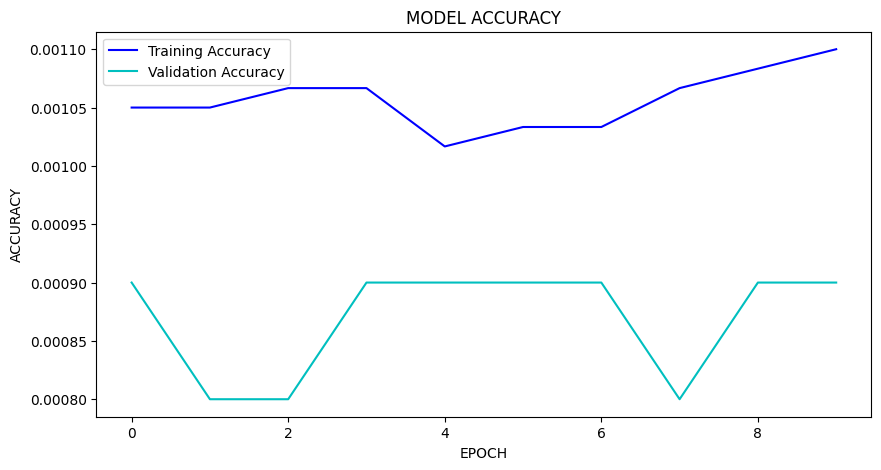

In [3]:
from keras.layers import Input, Dense
from keras.models import Model
from keras.datasets import fashion_mnist
import numpy as np
import matplotlib.pyplot as plt

# Loading the data
(x_train, _), (x_test, _) = fashion_mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

# Introducing the Noise
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

# Model definition:

# this is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats
# this is our input placeholder
input_img = Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(encoded)
# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)
# this model maps an input to its encoded representation
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy', metrics=['accuracy'])

# Training the model
history = autoencoder.fit(x_train_noisy, x_train,
                          epochs=10,
                          batch_size=256,
                          shuffle=True,
                          validation_data=(x_test_noisy, x_test_noisy))

# Predictions on the test data
decoded_imgs = autoencoder.predict(x_test_noisy)

# Visualization of noisy and reconstructed images
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # Noisy data
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Reconstruction data
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

# Plotting the Loss
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], 'g-', label='Training Loss')
plt.plot(history.history['val_loss'], 'r-', label='Validation Loss')
plt.title('MODEL LOSS')
plt.xlabel('EPOCH')
plt.ylabel('LOSS')
plt.legend()
plt.show()

# Plotting accuracy
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], 'b-', label='Training Accuracy')
plt.plot(history.history['val_accuracy'], 'c-', label='Validation Accuracy')
plt.title('MODEL ACCURACY')
plt.xlabel('EPOCH')
plt.ylabel('ACCURACY')
plt.legend()
plt.show()
